# Logistic Regression

Despite it's name, logistic regression is actually a classification algorithm. It shares some properties with linear regression:

1. It's a linear model, which is to say it performs a linear combination of all the features using coefficients to scale each feature.
2. The coefficients are the thing being "learned."
3. Ultimately the model can be represented by a fairly simple math function.

But there are some crucial differences as well:

1. The shape of the function is not linear, but is "logistic" also sometimes known as "sigmoid" function. These functions have an "s-shape."
2. The function is bounded between 0 and 1, and all of the labels for our dataset must be exactly 0 or 1. 
    * caveats ahead: this is true for "binary classification.
    * For multiclass logistic regression this isn't exactly true. 
        * More on that soon...

## Lets look at a sigmoid:

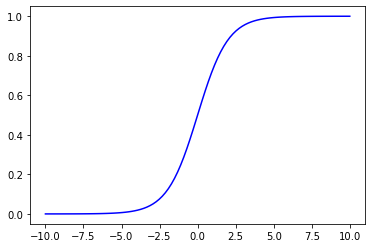

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# np.e is Euler's constant, the base of the natural logarithm 
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

# Construct a range to plot
r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid(r), 'b')
plt.show()

## Where are the coefficents?

In linar regression we had a familair function of a line with the formula:

```
y = mx + b
```

Where if we had many features, we have a unique `m` for each feature. With logistic regression we still have that same effect, where each feature has it's own coefficent and we have an intercept as well, however they all now appear as part of the exponent on the bottom of the division:

```
y = 1 / (1 + e^-(b + m1x1 + m2x2 ... mnxn))
```

And, instead of "y" we really predict something we intepret as the probability that the datapoint is a 1. Often we express this in the equation using `p` instead of `y`:

![](assets/LogReg_eq.png)

## How do these impact the function shape?

Lets look at an example...

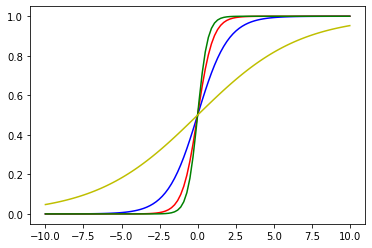

In [2]:
# np.e is Euler's constant, the base of the natural logarithm 
def sigmoid_two(x, m, b):
    return (1 / (1 + np.exp(-m*x + b)))


# The coef modifies the steepness of the curve
r = np.linspace(-10, 10, 100)
plt.plot(r, sigmoid_two(r, 1, 0), 'b')
plt.plot(r, sigmoid_two(r, 2, 0), 'r')
plt.plot(r, sigmoid_two(r, 3, 0), 'g')
plt.plot(r, sigmoid_two(r, .3, 0), 'y')
plt.show()

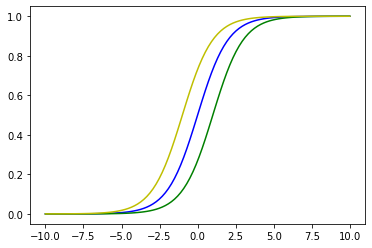

In [3]:
# The intercept modifies the "balancing point" of the curve
# by shifting it left and right.
plt.plot(r, sigmoid_two(r, 1, 0), 'b')
plt.plot(r, sigmoid_two(r, 1, 1), 'g')
plt.plot(r, sigmoid_two(r, 1, -1), 'y')

## What about the data?

Since the data is all labeled either 0 or 1 we end up with a 

### Lets make some linear data again...

But this time lets give the data labels of 0 or 1 based on their magnitude... This very simple relationship is ideal for logistic regression, but you'll find it works well even with less clear boundaries...

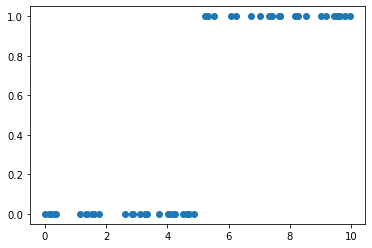

In [4]:
import numpy as np

rng = np.random.RandomState(12)
x = 10 * rng.rand(50) 
y = x > 5
plt.scatter(x, y);

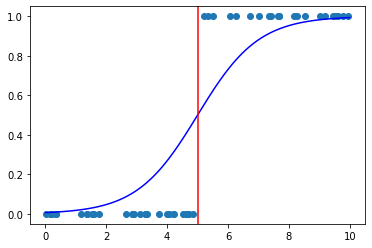

In [5]:
# And with a manually chosen sigmoid overlayed...
r = np.linspace(0, 10, 100)
plt.scatter(x, y);
plt.plot(r, sigmoid_two(r, 1, 5), 'b')
plt.axvline(x = 5, color = 'r')
plt.show()

## Notes:

The red line denotes the "decision boundary" which occurs at the inflection point on the sigmoid function: anything to the right of that line gets classified as a `1` whatever that means in our dataset, to the left gets classified as a `0`. The actual `y` position along the sigmoid represents our confidence in that prediction — the higher up and further right the more likely we think this datapoint is a 1, and the further down/left the more likely we think it's a `0` 

## Lets actually fit a model and see what it comes up with...

In [6]:
from sklearn.linear_model import LogisticRegression

# Once again, transform our vector...
column_x = x[:, np.newaxis]

model = LogisticRegression()
model.fit(column_x, y)

print(model.coef_, model.intercept_)


[[2.00124219]] [-10.48853498]


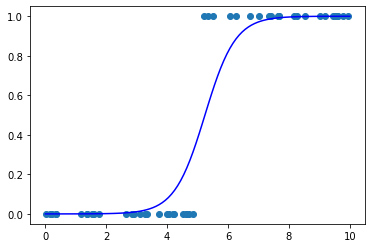

In [7]:
r = np.linspace(0, 10, 100)
plt.scatter(x, y);
plt.plot(r, sigmoid_two(r, model.coef_[0][0], -model.intercept_[0]), 'b')
plt.show()

## Multiple Classes vs Binary Classification

There are two common ways to perform multi-class classification with logistic regression. One is is a strategy called "One-vs-All" and it's a very simple extension of the basic idea: Create a unique sigmoid for every class represented in the dataset.

So, if we have 3 classes (lets say cat, dog, and frog) then we'll create and fit three sigmoids such that we have:

One classifying "cat or not cat"
One classifying "dog or not dog"
And one classifying "frog or not frog"

When fitting the data all non-cat datapoints will be treated as not cats when fitting the first function, and so on.

When it's time to make a prediction we run our data through all three of these functions and the one with the highest probability is chosen. 

The second is called "multinomial" or sometimes "softmax." The setup is more or less the same, we still create three sets of coefs and 3 intercepts, and therefore fit 3 sigmoids. However, the output values for each of those three functions are combined with a function called "softmax" which takes each output and divides it by the sum of the three output values. This forces all the values into the range 0-1 and makes them sum to 1.

We then interpret those values as the probability or confidence of each prediction. 

Fitting a multinomial usually takes longer to converge than fitting a ovr.